In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [2]:
dados = pd.concat([pd.read_csv("Youtube01-Psy.csv"),
                   pd.read_csv("Youtube02-KatyPerry.csv"),
                   pd.read_csv("Youtube03-LMFAO.csv"),
                   pd.read_csv("Youtube04-Eminem.csv"),
                   pd.read_csv("Youtube05-Shakira.csv")])
dados.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [3]:
print("Número de linhas:", dados.shape[0])
print("Número de colunas:", dados.shape[1])

Número de linhas: 1956
Número de colunas: 5


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


Os dados precisam serem filtrados. Vamos selecionar as colunas:

"CONTENT": Esta coluna contém os comentários publicados nos diferentes videos, existem diferentes valores de string.

"CLASS": Contém os valores 1 ou 0 fara spam ou não spam, assim, possui valores inteiros. 

In [5]:
spam = dados[['CONTENT', "CLASS"]]
spam.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [6]:
spam.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

Vemos que não existem valores faltentes nos dados

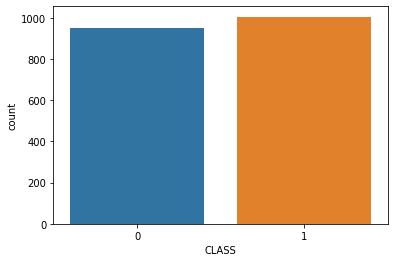

In [7]:
sns.countplot(spam["CLASS"])


Vemos que os dados estão balanceados, há pouca diferença entre os comentários classificados como spam(1) dos não spam (0)

Vamos embaralhar os dados e separar os as variáveis

In [9]:
dshuffle = spam.sample(frac=1)
comentarios = dshuffle['CONTENT']
rotulo = dshuffle["CLASS"] 

Podemos contabiliza o núimero de diferentes palavaras que aparecem nos comentários

In [11]:
vect = CountVectorizer(stop_words='english').fit(comentarios)
print("Quantiade de palavras:{}".format(len(vect.vocabulary_)))
print(vect.vocabulary_)

Quantiade de palavras:4229
{'guys': 1830, 'check': 922, 'extraordinary': 1493, 'website': 4050, 'called': 847, 'zonepa': 4212, 'com': 997, 'make': 2447, 'money': 2589, 'online': 2783, 'start': 3551, 'working': 4123, 'home': 1940, 'today': 3777, 'making': 2452, '000': 1, 'month': 2598, 'visit': 3978, 'does': 1275, 'war': 4021, 'illustrate': 2023, 'exclusive': 1469, 'space': 3500, 'mountain': 2612, 'refers': 3139, 'helpless': 1904, 'death': 1182, 'tax': 3697, 'reviews': 3193, 'special': 3513, 'music': 2636, 'started': 3552, 'hating': 1878, 'katy': 2193, 'perry': 2882, 'finding': 1593, 'stole': 3570, 'ideas': 2003, 'videos': 3955, 'old': 2770, 'comic': 1006, 'book': 763, 'catchy': 870, '300': 189, 'subscribers': 3605, 'tomorrow': 3782, 'll': 2348, 'epic': 1433, 'hunger': 1982, 'games': 1699, 'video': 3953, 'ummm': 3868, 'just': 2179, 'hit': 1928, '1k': 116, 'minecraft': 2549, 'help': 1900, 'checking': 924, 'hi': 1914, 'heard': 1891, 'dribbleproshot': 1315, 'search': 3302, 'google': 1774, 

In [42]:
pipeline = Pipeline([('bag_of_word', CountVectorizer()),
                    ('random_forest', RandomForestClassifier())
                    ])
pipeline

Pipeline(memory=None,
         steps=[('bag_of_word',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabul...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                

In [43]:
pipeline.fit(comentarios[:1500],rotulo[:1500])

Pipeline(memory=None,
         steps=[('bag_of_word',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabul...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                

Agora chamamos a função que verifica a potuação da previsão

In [44]:
pipeline.score(comentarios[1500:],rotulo[1500:])

0.956140350877193

Obtivemos uma pontuação de 0.95. 
Vamos tentar fazer uma previsão com duas diferentes frases e ver se o modelo consegue rotular como spam (1) ou não spam (0):

In [45]:
prev = pipeline.predict(comentarios[1500:])
confusion_matrix(rotulo[1500:], prev)

array([[218,   7],
       [ 13, 218]], dtype=int64)

A matrix de confusão mostra poucas classificações erradas comparadas com as classificações corretas.

In [16]:
pipeline.predict(['what a neat video!'])

array([0], dtype=int64)

Como vemos, ele preveu corretamente como não spam; o póximo comentário:

In [17]:
pipeline.predict(['plz subscribe to my channel'])

array([1], dtype=int64)

Classificou o comentário como spam.
Para superar isso vamos melhorar nosso modelo usando o cross-validation

In [20]:
score = cross_val_score(pipeline, comentarios, rotulo, cv=6)
print("Precisão: %.2f (+/- %.2f)" % (score.mean(),score.std()*2))

Precisão: 0.96 (+/- 0.02)


Parece que tivemos uma boa melhora.
Agora vamos adicionar o TF-IDF em nosso modelo para aumenta a precisão:

In [48]:
pipeline2 = Pipeline([('countvectorizer',CountVectorizer()),
                    ('tfidftransformer',TfidfTransformer(norm=None)),
                    ('randomforestclassifier',RandomForestClassifier())
                     ])

In [49]:
score2 = cross_val_score(pipeline2, comentarios, rotulo, cv=6)
print("Precisão: %.2f (+/- %.2f)" % (score2.mean(),score2.std()*2))

Precisão: 0.96 (+/- 0.01)


In [52]:
pipeline2.fit(comentarios[:1500],rotulo[:1500])
prev2 = pipeline2.predict(comentarios[1500:])
confusion_matrix(rotulo[1500:], prev2)

array([[220,   5],
       [ 13, 218]], dtype=int64)

Obtivemos uma pequena mudança.
Vamos tentar ajustar os parâmetos e tentar encontrar o que fornece a melhor pontuação de precisão do modelo.

In [37]:
parametros = {
    'countvectorizer__max_features': (None, 1000, 2000),
    'countvectorizer__ngram_range': ((1,1),(1,2)), #unigrams ou bigrams
    'countvectorizer__stop_words': ('english', None),
    'tfidftransformer__use_idf': (True,False),
    'randomforestclassifier__n_estimators':(20,50,100)
     }

grid = GridSearchCV(pipeline2, parametros, cv=6, n_jobs=1, verbose=1)    

In [59]:
grid.fit(comentarios[:1500],rotulo[:1500])

Fitting 6 folds for each of 72 candidates, totalling 432 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 432 out of 432 | elapsed:  4.2min finished


GridSearchCV(cv=6, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('countvectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                 

In [60]:
print("Melhor precisão: {}".format(grid.best_score_))
print("Melhores parâmetros: {}".format(grid.best_params_))

Melhor precisão: 0.9620000000000001
Melhores parâmetros: {'countvectorizer__max_features': 2000, 'countvectorizer__ngram_range': (1, 1), 'countvectorizer__stop_words': 'english', 'randomforestclassifier__n_estimators': 100, 'tfidftransformer__use_idf': False}


In [61]:
prev3 = grid.predict(comentarios[1500:])
confusion_matrix(rotulo[1500:], prev3)

array([[216,   9],
       [ 15, 216]], dtype=int64)